## CMSC 197 (Machine Learning) HW3

Guides, Emmanuel Tarek Shayne <br/> 2019-51020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

# preprocessing
from sklearn.model_selection import train_test_split

# building the model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

# validation of the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
# load data
df = pd.read_csv("data/advertising.csv", index_col = 0)
print("Size of the data:", df.shape)
df.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
# copy df to another df for standardization
df_standardized = df.copy() 

#standardizing the dataframe
for i in df_standardized:
    df_standardized[i] = (df_standardized[i] - np.mean(df_standardized[i]))/np.std(df_standardized[i], ddof=1)
df_standardized

,TV,Radio,Newspaper,Sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
196,-1.267759,-1.317724,-0.769287,-1.230964
197,-0.615491,-1.236899,-1.031011,-0.828469
198,0.348934,-0.940539,-1.109069,-0.234310
199,1.590574,1.261955,1.636743,2.199827


In [5]:
# separating x and y values
x = df_standardized.drop("Sales", axis = 1)
y = df_standardized['Sales']
print(f"x:\n{x}\n\ny:\n{y}")

x:
           TV     Radio  Newspaper
1    0.967425  0.979066   1.774493
2   -1.194379  1.080097   0.667903
3   -1.512360  1.524637   1.779084
4    0.051919  1.214806   1.283185
5    0.393196 -0.839507   1.278593
..        ...       ...        ...
196 -1.267759 -1.317724  -0.769287
197 -0.615491 -1.236899  -1.031011
198  0.348934 -0.940539  -1.109069
199  1.590574  1.261955   1.636743
200  0.990720 -0.987687  -1.003461

[200 rows x 3 columns]

y:
1      1.548168
2     -0.694304
3     -0.905135
4      0.858177
5     -0.215143
         ...   
196   -1.230964
197   -0.828469
198   -0.234310
199    2.199827
200   -0.119311
Name: Sales, Length: 200, dtype: float64


In [6]:
# insert bias column of all ones
x.insert(0, 'bias', [1]*len(x))
x

,bias,TV,Radio,Newspaper
1,1,0.967425,0.979066,1.774493
2,1,-1.194379,1.080097,0.667903
3,1,-1.512360,1.524637,1.779084
4,1,0.051919,1.214806,1.283185
5,1,0.393196,-0.839507,1.278593
...,...,...,...,...
196,1,-1.267759,-1.317724,-0.769287
197,1,-0.615491,-1.236899,-1.031011
198,1,0.348934,-0.940539,-1.109069
199,1,1.590574,1.261955,1.636743


In [7]:
# splitting the data into 75%:25% ratio of train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}\n\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

print(f"\n\nx_train:\n{x_train.head()}\n\ny_train:\n{y_train.head()}")
print(f"\n\nx_test:\n{x_test.head()}\n\ny_test:\n{y_test.head()}")

x_train shape: (150, 4)
x_test shape: (50, 4)

y_train shape: (150,)
y_test shape: (50,)


x_train:
     bias        TV     Radio  Newspaper
115     1 -0.801853  1.585256   0.181187
174     1  0.248765 -1.088719  -0.815203
6       1 -1.611365  1.726701   2.040809
127     1 -1.621848  1.053156   0.920444
118     1 -0.822819 -1.513052  -0.723370

y_train:
115    0.110686
174   -0.445140
6     -1.307629
127   -1.422628
118   -0.885968
Name: Sales, dtype: float64


x_test:
     bias        TV     Radio  Newspaper
96      1  0.189362  0.561467   1.026052
16      1  0.563251  1.645876   1.026052
31      1  1.698897  0.339197   0.580661
159     1 -1.576422  0.918447   0.672494
129     1  0.853278  1.733436  -1.256002

y_test:
96     0.551514
16     1.605667
31     1.414003
159   -1.288463
129    2.046495
Name: Sales, dtype: float64


## Functions
In this section, initialize_weights(), predict(), compute_cost(), update_weights(), grad_descent(), and plot_costs() are defined

In [8]:
#initialize initial weights (init_w)
# choice argument is used for choosing the return val of init_w, all zeroes, 
# or all random float numbers between 0.0 and 1.0
def initialize_weights(choice):
    if(choice==0):
        return np.array([0.0, 0.0, 0.0, 0.0])  
    else:
        return np.array(np.random.uniform(low=0.0, high=1.0, size=4))
    
print(f"examples of randomized init_w:\n\n\t\
1. {initialize_weights(1)}\n\t\
2. {initialize_weights(1)}\n\t\
3. {initialize_weights(1)}")

examples of randomized init_w:

	1. [0.67293675 0.90783832 0.53875309 0.05470578]
	2. [0.8842257  0.1834531  0.52600074 0.06360537]
	3. [0.56837676 0.08747539 0.76554957 0.78445818]


In [9]:
# return predicted y value
def predict(data_against, weights):
    return np.dot(data_against, weights) # this is equivalent to np.sum(np.multiply(data_against, weights), axis = 1)

In [10]:
# return cost using the given formula
def compute_cost(y, y_predicted, length):
    return ( np.sum( (y_predicted-y) **2) )/(2*length)

In [11]:
def compute_gradient(x_train, y_train, y_hat):
    # array to contain all weights to return
    gradients = []
    # iterate through all columns
    for column in list(x_train.columns.values):
        # apply formula, then append to gradients
        gradients.append((1/x_train.shape[0])*np.sum((y_hat-y_train)*x_train[column]))
    #return gradients as an np.array
    return np.array(gradients)

In [12]:
# recalculate weights using the formula given
def update_weights(alpha, w, weights):
    return weights - (np.multiply(alpha, w))

In [13]:
# cache will be used later on for the tracing back of the behavior of MSE, cost, and R2
cache = []

# grad_descent function to take in number of iterations and the learning rate (alpha)
def grad_descent(iterations, alpha):
    
    #step 5.1: initialize weights, passing zero as parameter in order to get 4-element array of zeroes
    init_w = initialize_weights(0)
    #initialize cost array to place in cost per iteration
    cost_array = []
    
    # loop (iterations) number of times
    for i in range(iterations):
        
        #step 5.2: return predicted y value using training data, and weights
        y_hat = predict(x_train, init_w)
        
        #step 5.3: return the cost on the current model, append it on the list of all costs per iteration
        cost = compute_cost(y_train, y_hat, len(x_train))
        cost_array.append(cost)
        
        #step 5.4: return partial derivative of each weight, with respect to each parameter, as a matrix with size 4x1
        w = compute_gradient(x_train, y_train, y_hat)
        
        #step 5.5: update weights for next iteration
        init_w = update_weights(alpha, w, init_w)
        
        #extra step: add weights to cache, only add them every 10 iterations because of data rate limit
        if(i%10 == 0):
            cache.append(init_w)
    
    # convert both arrays to np.array
    cost_array = np.array(cost_array)
    init_w = np.array(init_w)
    
    # print both
    # print(np.array(init_w))
    # print(cost)
    
    return init_w, cost_array


In [14]:
# simple and straightforward plotting function.
# plots the behavior of the cost over a specified range of iterations of the given model
def plot_costs(x_start, x_end, x_spacing, alpha):
    plt.figure(figsize=(16,10))
    plt.xticks(np.arange(x_start, x_end+1, x_spacing))
    plt.xlabel(f"Iteration count (up to {x_end:,})", size=18)
    plt.ylabel("Cost amount", size=18)
    plt.title(f"On {x_end:,} iterations (alpha={alpha})")
    plt.plot(final_costs[x_start:x_end+1], linewidth=2.5, label="Cost")
    plt.legend(loc="upper right")
    plt.show() 

## Running grad_descent

In [15]:
# run grad_descent
# for this, run it 50,000 times, with learning rate 0.001
final_w, final_costs = grad_descent(50000, 0.001)
print(f"final weights: {final_w}")
print(f"final cost: {final_costs[-1]}")

final weights: [-0.00594585  0.74761782  0.54480926  0.01071968]
final cost: 0.05083950524077337


As seen from above, the final cost of the model is considerably low

## Plotting

First, over the total 50,000 iterations, we have this behavior of our costs over each iteration

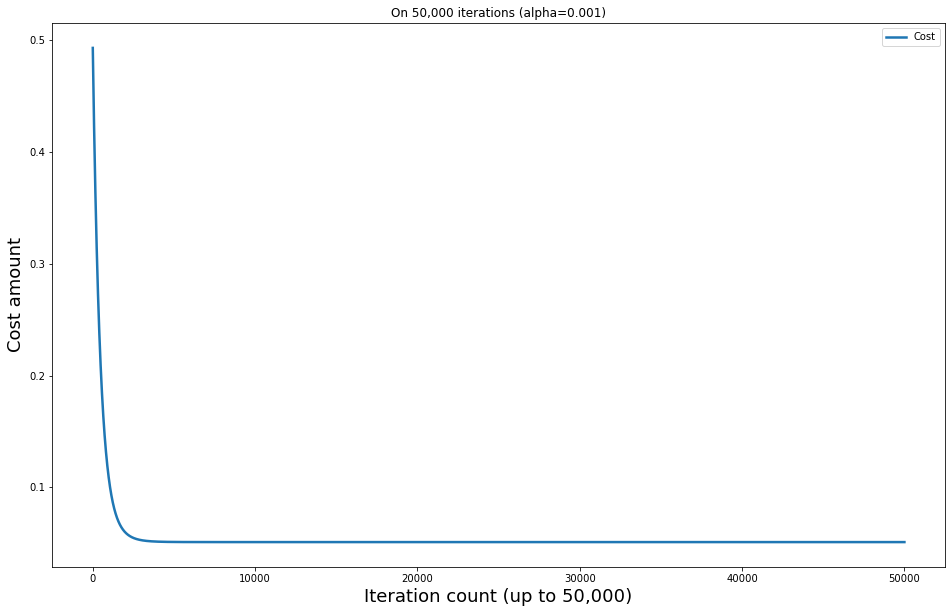

In [16]:
# plotting costs up to 50,000 iterations on alpha=0.001
plot_costs(0, 50000, 10000, 0.001)

Zooming in to 10,000 iterations of the model, we have this

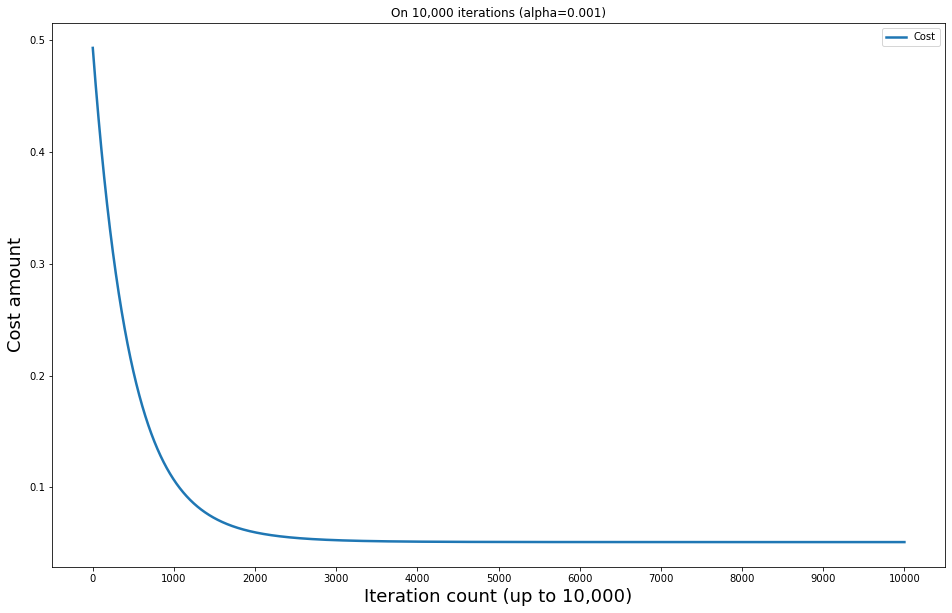

In [17]:
# plotting costs up to 10,000 iterations on alpha=0.001
plot_costs(0, 10000, 1000, 0.001)

Further doing so over 5,000 iterations, we have this:

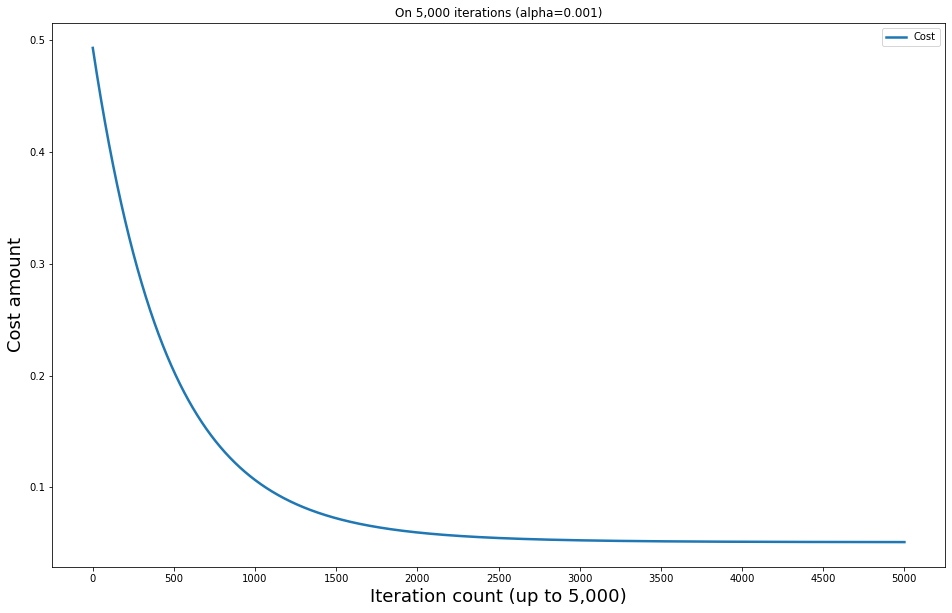

In [18]:
# plotting costs up to 5,000 iterations on alpha=0.001
plot_costs(0, 5000, 500, 0.001)

Lasly, checking it at around 3,000 iterations:

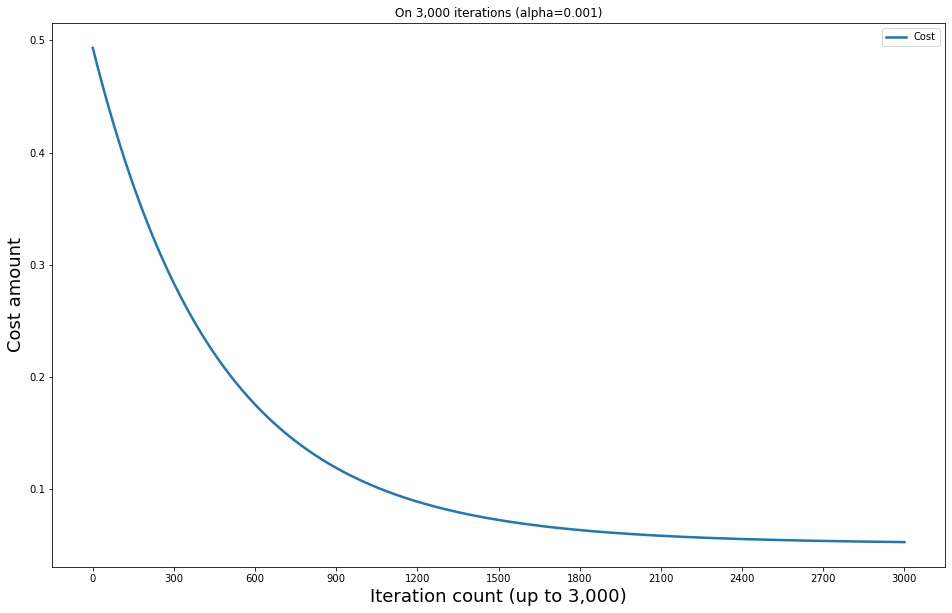

In [19]:
# plotting costs up to 3,000 iterations on alpha=0.001
plot_costs(0, 3000, 300, 0.001)

As seen from the plots, we can roughly estimate that at around ~900-1,500 iterations, the cost of the model gradually decreases until it nearly plateaus, since it decreases very slowly, over the remaining iterations. This behavior of slowly decreasing when it reaches near the global bottom is indicative and typical of the gradient descent algorithm

## Checking MSE and R2 (train)

In [20]:
# fitting final weights to calculate y_hat for comparison
y_hat_predicted = predict(x_train, final_w)
# getting r2_score from the grad_desc model
print(f"r2_score:\t{sklearn.metrics.r2_score(y_train, y_hat_predicted)}")

# verifying r2_score above by comparing it to OLS
ols = LinearRegression()
ols.fit(x_train, y_train).coef_

r2_OLS = r2_score(y_train, ols.predict(x_train))
print(f"r2_OLS:\t\t{r2_OLS}")

r2_score:	0.8966445527601498
r2_OLS:		0.8966445527601498


In [21]:
print(f"MSE:\t\t{sklearn.metrics.mean_squared_error(y_train, y_hat_predicted)}")

MSE:		0.10167901048154673


As seen from above, both the R2 scores, and the MSE of the model produced acceptable rates. Furthermore, the sklearn implementation gave us equal values of the R2 score as our model.

## Checking MSE and R2 (test)

In [22]:
# fitting final weights to calculate y_hat for comparison
y_hat_predicted = predict(x_test, final_w)
# getting r2_score from the grad_desc model
print(f"r2_score:\t{sklearn.metrics.r2_score(y_test, y_hat_predicted)}")

# verifying r2_score above by comparing it to OLS
ols = LinearRegression()
ols.fit(x_test, y_test).coef_

r2_OLS = r2_score(y_train, ols.predict(x_train))
print(f"r2_OLS:\t\t{r2_OLS}")

r2_score:	0.893516332016368
r2_OLS:		0.8893062185307362


In [23]:
print(f"MSE:\t\t{sklearn.metrics.mean_squared_error(y_test, y_hat_predicted)}")

MSE:		0.1057982249958952


As seen from the results using the test set, both the R2 score and the MSE are consistent.

## y_hat and y scatterplots

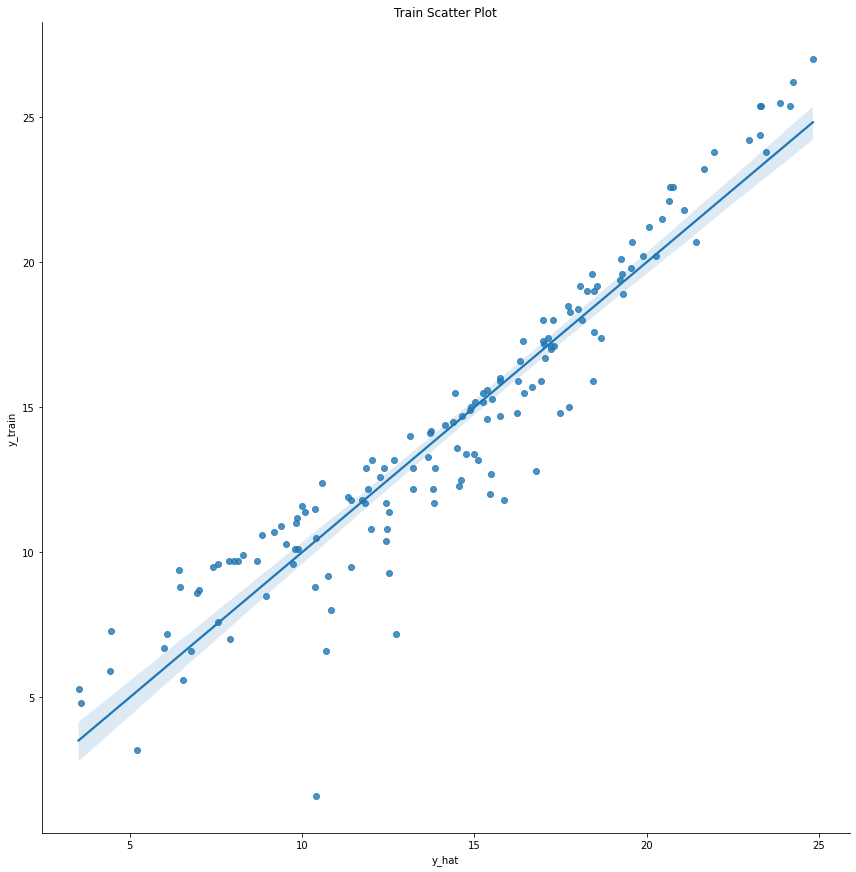

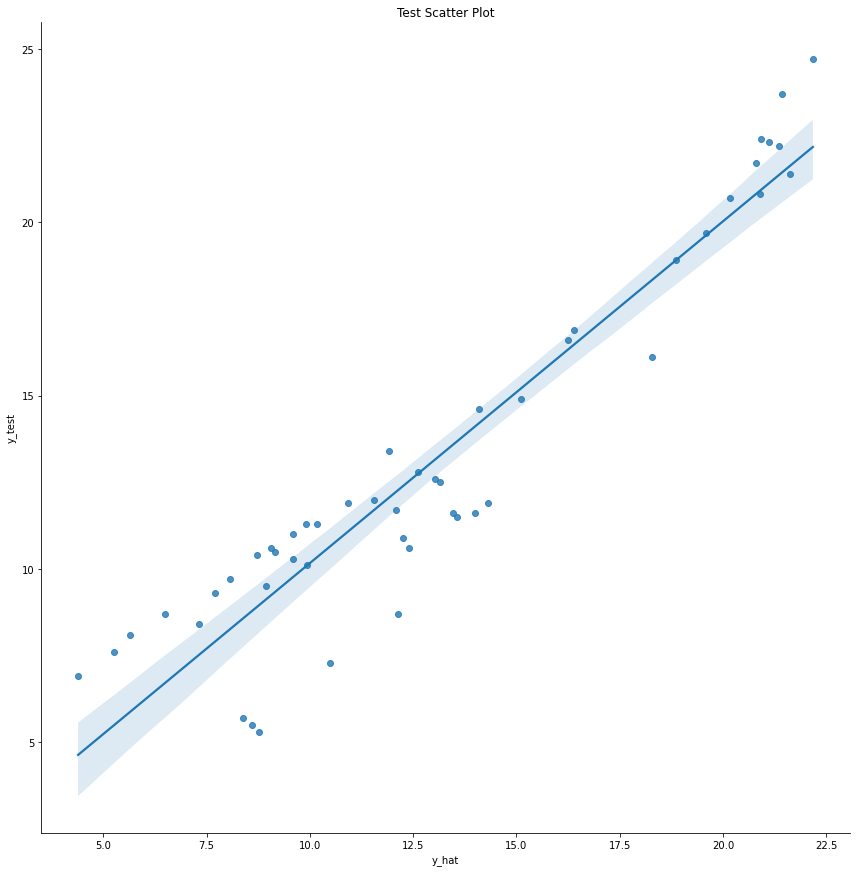

In [24]:
# Getting non-standardized values for their mean and std
x_normal = df.drop("Sales", axis = 1)
y_normal = df['Sales']

# getting y_hat from train data, and test data respectively
y_hat_scatter_train = predict(x_train, final_w)
y_hat_scatter_test = predict(x_test, final_w)

# getting and reconverting y_hat train and test values to their non-standardized form
y_hat_scatter_train_normal = y_hat_scatter_train * np.std(y_normal, ddof=1) + np.mean(y_normal)
y_hat_scatter_test_normal = y_hat_scatter_test * np.std(y_normal, ddof=1) + np.mean(y_normal)

# getting and reconverting y train and test values to their non-standardized form
y_train_normal = y_train * np.std(y_normal, ddof=1) + np.mean(y_normal)
y_test_normal = y_test * np.std(y_normal, ddof=1) + np.mean(y_normal)

# creating a dictionary, and a dataframe for the train y and y_hat values
scatter_dict_train = {'y_hat': y_hat_scatter_train_normal, 'y_train': y_train_normal}
df_scatter_train = pd.DataFrame(data = scatter_dict_train)

# creating a dictionary, and a dataframe for the test y and y_hat values
scatter_dict_test = {'y_hat': y_hat_scatter_test_normal, 'y_test': y_test_normal}
df_scatter_test = pd.DataFrame(data = scatter_dict_test)

# plotting train y_hat and y values
train_linplot = sns.lmplot(x="y_hat", y="y_train", data=df_scatter_train, height=12, fit_reg = True)
ax = plt.gca()
ax.set_title("Train Scatter Plot")
plt.show()

# plotting test y_hat and y values
test_linplot = sns.lmplot(x="y_hat", y="y_test", data=df_scatter_test, height=12, fit_reg=True)
ax = plt.gca()
ax.set_title("Test Scatter Plot")
plt.show()

With both the R2 scores of train and test being around 0.89 to 0.90, it is reasonable to see the near linear relationship between the y_train and its predicted values, as well as with the y_test and its predicted values.

## Error, R2, and Cost in relation to the number of iterations

In [25]:
# check the cache
cache = np.array(cache)
print(f"Since by default we were running 50k iterations, we would expect a cache length of {cache.shape[0]}")

Since by default we were running 50k iterations, we would expect a cache length of 5000


In [26]:
mse_grandArray = []
R2_grandArray = []
cost_grandArray = []

# iterate through the cache of weights, and solve for the MSE, R2, and Cost for each iterated weight. 
for i in range(cache.shape[0]):
    y_hat_iter = predict(x_train, cache[i])
    cost_grandArray.append(compute_cost(y_train, y_hat_iter, len(x_train)))
    mse_grandArray.append(sklearn.metrics.mean_squared_error(y_train, y_hat_iter))
    R2_grandArray.append(sklearn.metrics.r2_score(y_train, y_hat_iter))

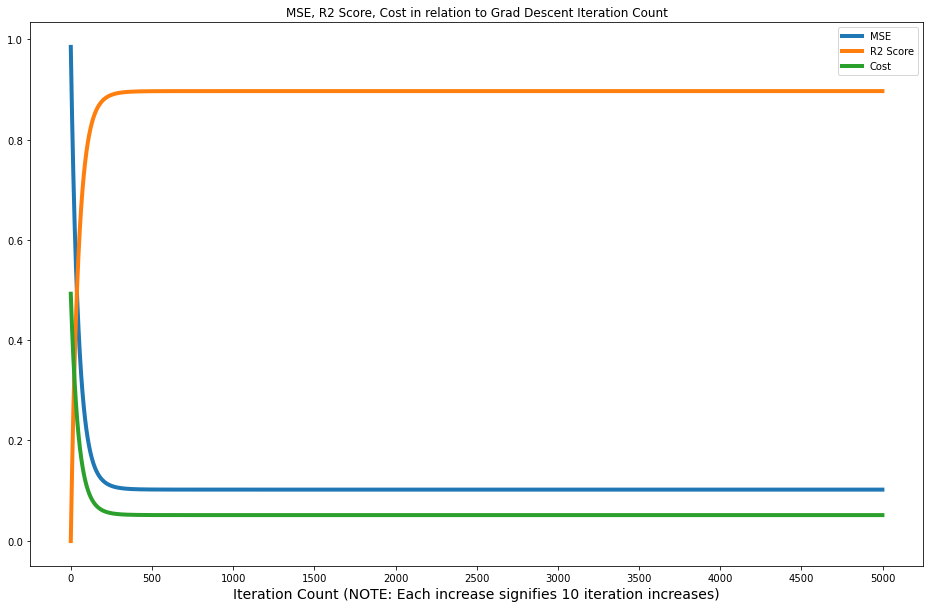

In [27]:
grand_Arrays = {'MSE': mse_grandArray, 'R2 Score': R2_grandArray, 'Cost': cost_grandArray}
df_grandArrays = pd.DataFrame(data = grand_Arrays)


plt.figure(figsize=(16,10))
plt.plot(df_grandArrays['MSE'], linewidth = 4, label = 'MSE')
plt.plot(df_grandArrays['R2 Score'], linewidth = 4, label = 'R2 Score')
plt.plot(df_grandArrays['Cost'], linewidth = 4, label = 'Cost')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(0, 5001, 500))
plt.title("MSE, R2 Score, Cost in relation to Grad Descent Iteration Count")

#Since because of data rate limit concerns, we only added every 10th grad_desc iteration weights to the cache
plt.xlabel("Iteration Count (NOTE: Each increase signifies 10 iteration increases)", size=14) 
plt.show()

Based on the graph above, we can see that as the number of iterations a gradient descent algorithm performs increases, the MSE and the Cost decreases, whereas the R2 Score increases.

It is also apparent that at around iteration count 500 on the graph above, we can already see an obvious stagnation of the results of the MSE, R2, and Cost. Given that, for the next calculation, we will only use ( 500 * 10 ) iterations in the grad_descent for convenience.

In [28]:
# Checking cost and error per alpha level, or learning rate

# this is the cache of weights from 0.001 learning rate beforehand. saving it here to save time and processing speed.
prev_weights = cache[:1000]

# these are the level of learning rates that we will run 10k iterations of grad_descent into.
alphas_array = [0.1, 0.01, 0.5, 0.2, 0.000001, 1.0]

# this will be the dictionary where we will add all the weight results from the different levels of alpha
alphas_weights_dict = { "0.001":prev_weights }

for i in alphas_array:
    cache = []
    grad_descent(10000, i )
    alphas_weights_dict[str(i)] = cache
    print(f"alpha {i} done.")
    print(f"{i} cache length is {len(cache)}\n")
print("all done")


alpha 0.1 done.
0.1 cache length is 1000

alpha 0.01 done.
0.01 cache length is 1000

alpha 0.5 done.
0.5 cache length is 1000

alpha 0.2 done.
0.2 cache length is 1000

alpha 1e-06 done.
1e-06 cache length is 1000

alpha 1.0 done.
1.0 cache length is 1000

all done


Now that our massive dictionary containing all the weights (by 10000/10 iterations) by all of our defined alphas is complete, their MSE and cost can now be individually calculated. 

## Plotting the MSE and Costs in relation to learning rate

In [29]:
#declaring arrays to be used on plotting MSEs and Costs

alpha_0001_MSEs = []
alpha_0001_Costs = []

alpha_01_MSEs = []
alpha_01_Costs = []

alpha_001_MSEs = []
alpha_001_Costs = []

alpha_05_MSEs = []
alpha_05_Costs = []

alpha_02_MSEs = []
alpha_02_Costs = []

alpha_0000001_MSEs = []
alpha_0000001_Costs = []

alpha_10_MSEs = []
alpha_10_Costs = []

alphas_MSE_Cost_dict = {}

print(alphas_weights_dict.keys())

dict_keys(['0.001', '0.1', '0.01', '0.5', '0.2', '1e-06', '1.0'])


In [30]:
# Forming dictionary for all alpha's MSEs and Costs
# Doing this one by one for clarity

# finding MSE and Costs in the entire weight cache of alpha 0.001
for i in alphas_weights_dict['0.001']:
    y_hat_alphas = predict(x_train, i)
    alpha_0001_MSEs.append(sklearn.metrics.mean_squared_error(y_train, y_hat_alphas))
    alpha_0001_Costs.append(compute_cost(y_train, y_hat_alphas, len(x_train)))
alphas_MSE_Cost_dict['alpha 0.001 MSE'] = alpha_0001_MSEs
alphas_MSE_Cost_dict['alpha 0.001 Cost'] = alpha_0001_Costs

# finding MSE and Costs in the entire weight cache of alpha 0.1
for i in alphas_weights_dict['0.1']:
    y_hat_alphas = predict(x_train, i)
    alpha_01_MSEs.append(sklearn.metrics.mean_squared_error(y_train, y_hat_alphas))
    alpha_01_Costs.append(compute_cost(y_train, y_hat_alphas, len(x_train)))
alphas_MSE_Cost_dict['alpha 0.1 MSE'] = alpha_01_MSEs
alphas_MSE_Cost_dict['alpha 0.1 Cost'] = alpha_01_Costs

# finding MSE and Costs in the entire weight cache of alpha 0.01
for i in alphas_weights_dict['0.01']:
    y_hat_alphas = predict(x_train, i)
    alpha_001_MSEs.append(sklearn.metrics.mean_squared_error(y_train, y_hat_alphas))
    alpha_001_Costs.append(compute_cost(y_train, y_hat_alphas, len(x_train)))
alphas_MSE_Cost_dict['alpha 0.01 MSE'] = alpha_001_MSEs
alphas_MSE_Cost_dict['alpha 0.01 Cost'] = alpha_001_Costs

# finding MSE and Costs in the entire weight cache of alpha 0.5
for i in alphas_weights_dict['0.5']:
    y_hat_alphas = predict(x_train, i)
    alpha_05_MSEs.append(sklearn.metrics.mean_squared_error(y_train, y_hat_alphas))
    alpha_05_Costs.append(compute_cost(y_train, y_hat_alphas, len(x_train)))
alphas_MSE_Cost_dict['alpha 0.5 MSE'] = alpha_05_MSEs
alphas_MSE_Cost_dict['alpha 0.5 Cost'] = alpha_05_Costs

# finding MSE and Costs in the entire weight cache of alpha 0.2
for i in alphas_weights_dict['0.2']:
    y_hat_alphas = predict(x_train, i)
    alpha_02_MSEs.append(sklearn.metrics.mean_squared_error(y_train, y_hat_alphas))
    alpha_02_Costs.append(compute_cost(y_train, y_hat_alphas, len(x_train)))
alphas_MSE_Cost_dict['alpha 0.2 MSE'] = alpha_02_MSEs
alphas_MSE_Cost_dict['alpha 0.2 Cost'] = alpha_02_Costs

# finding MSE and Costs in the entire weight cache of alpha 0.000001
for i in alphas_weights_dict['1e-06']:
    y_hat_alphas = predict(x_train, i)
    alpha_0000001_MSEs.append(sklearn.metrics.mean_squared_error(y_train, y_hat_alphas))
    alpha_0000001_Costs.append(compute_cost(y_train, y_hat_alphas, len(x_train)))
alphas_MSE_Cost_dict['alpha 0.000001 MSE'] = alpha_0000001_MSEs
alphas_MSE_Cost_dict['alpha 0.000001 Cost'] = alpha_0000001_Costs

# finding MSE and Costs in the entire weight cache of alpha 1.0
for i in alphas_weights_dict['1.0']:
    y_hat_alphas = predict(x_train, i)
    alpha_10_MSEs.append(sklearn.metrics.mean_squared_error(y_train, y_hat_alphas))
    alpha_10_Costs.append(compute_cost(y_train, y_hat_alphas, len(x_train)))
alphas_MSE_Cost_dict['alpha 1.0 MSE'] = alpha_10_MSEs
alphas_MSE_Cost_dict['alpha 1.0 Cost'] = alpha_10_Costs

In [31]:
# creating dataframe
df_Alpha_MSES_Cost = pd.DataFrame(data = alphas_MSE_Cost_dict)

In [32]:
# checking the dataframe of MSEs and Costs of different learning rates
df_Alpha_MSES_Cost

,alpha 0.001 MSE,alpha 0.001 Cost,alpha 0.1 MSE,alpha 0.1 Cost,alpha 0.01 MSE,alpha 0.01 Cost,alpha 0.5 MSE,alpha 0.5 Cost,alpha 0.2 MSE,alpha 0.2 Cost,alpha 0.000001 MSE,alpha 0.000001 Cost,alpha 1.0 MSE,alpha 1.0 Cost
0,0.984781,0.492391,0.805143,0.402571,0.967568,0.483784,0.296708,0.148354,0.645362,0.322681,0.986703,0.493351,0.151248,0.075624
1,0.965784,0.482892,0.183220,0.091610,0.798311,0.399155,0.101710,0.050855,0.110230,0.055115,0.986684,0.493342,0.101679,0.050840
2,0.947213,0.473606,0.114020,0.057010,0.663271,0.331636,0.101679,0.050840,0.102070,0.051035,0.986664,0.493332,0.101679,0.050840
3,0.929056,0.464528,0.104068,0.052034,0.555340,0.277670,0.101679,0.050840,0.101707,0.050854,0.986645,0.493323,0.101679,0.050840
4,0.911306,0.455653,0.102237,0.051119,0.468919,0.234460,0.101679,0.050840,0.101681,0.050841,0.986626,0.493313,0.101679,0.050840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.101680,0.050840,0.101679,0.050840,0.101679,0.050840,0.101679,0.050840,0.101679,0.050840,0.967768,0.483884,0.101679,0.050840
996,0.101680,0.050840,0.101679,0.050840,0.101679,0.050840,0.101679,0.050840,0.101679,0.050840,0.967749,0.483874,0.101679,0.050840
997,0.101680,0.050840,0.101679,0.050840,0.101679,0.050840,0.101679,0.050840,0.101679,0.050840,0.967730,0.483865,0.101679,0.050840
998,0.101680,0.050840,0.101679,0.050840,0.101679,0.050840,0.101679,0.050840,0.101679,0.050840,0.967711,0.483856,0.101679,0.050840


## Plotting MSEs of differing Alpha Values

In [33]:
# Function used to generate various plots below

# isMSE = True for MSE, False for Cost, 'head' is for the number of rows to be used
def draw_plot_MSE_Cost(linewidth, head, step, isMSE):
    plt.figure(figsize=(16,10))
    
    for i in alphas_weights_dict.keys():
        plt.plot(df_Alpha_MSES_Cost[f'alpha {str(format(float(i), ".6f")) if "e" in i else str(i)} {"MSE" if isMSE else "Cost"}'].head(head), linewidth = linewidth, label = f'alpha {i}')
    plt.legend(loc = 'upper right')
    plt.xticks(np.arange(0, head+1, step))
    plt.title(f'Learning rates and their {"MSE" if isMSE else "Cost"}s')

    #Since because of data rate limit concerns, we only added every 10th grad_desc iteration weights to the cache
    plt.xlabel("Iteration Count (NOTE: Each increase signifies 10 iteration increases)", size=14) 
    plt.show()

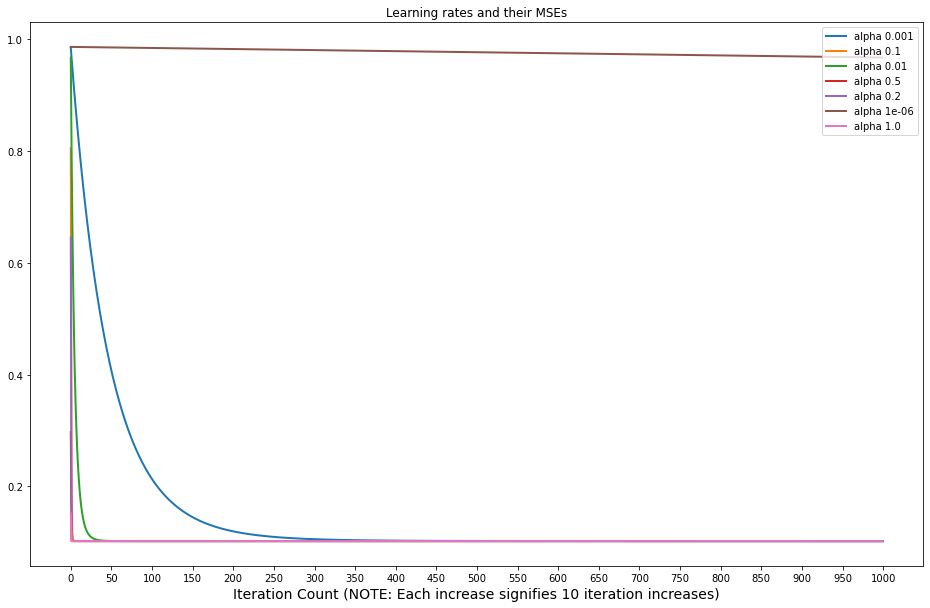

In [34]:
# First 1000 rows
draw_plot_MSE_Cost(2, 1000, 50, True)

## Checking the graph with xticks limited to first 300 rows

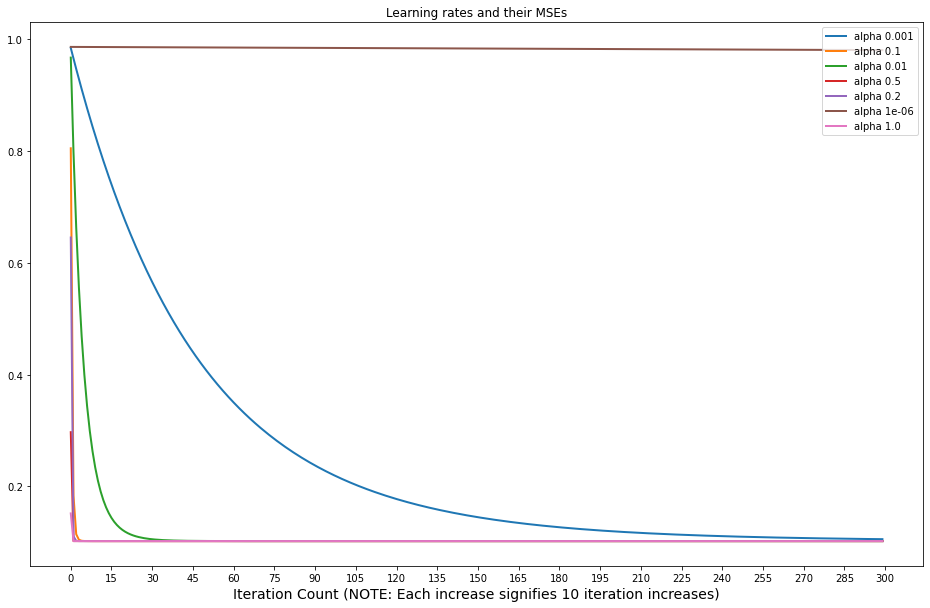

In [35]:
draw_plot_MSE_Cost(2, 300, 15, True)

## Checking the graph with xticks limited to first 100 rows

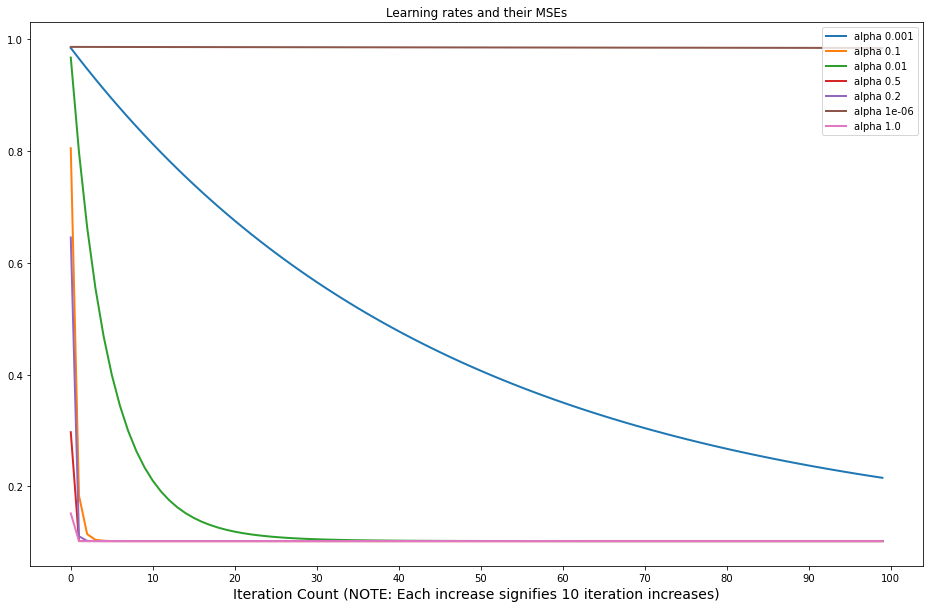

In [36]:
draw_plot_MSE_Cost(2, 100, 10, True)

## Plotting Costs of different Alpha values

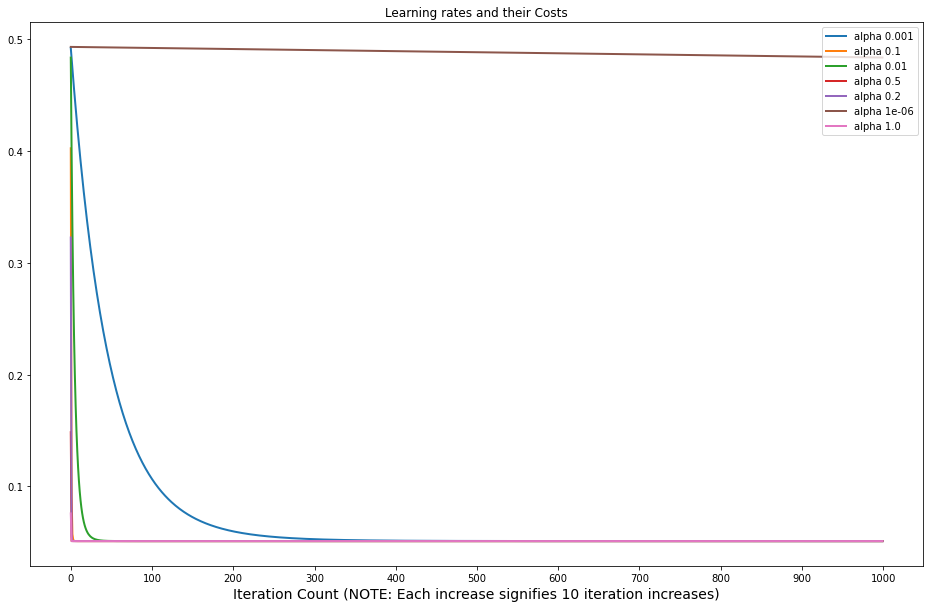

In [37]:
# First 1000 rows
draw_plot_MSE_Cost(2, 1000, 100, False)

## Checking the graph with xticks limited to first 300 rows

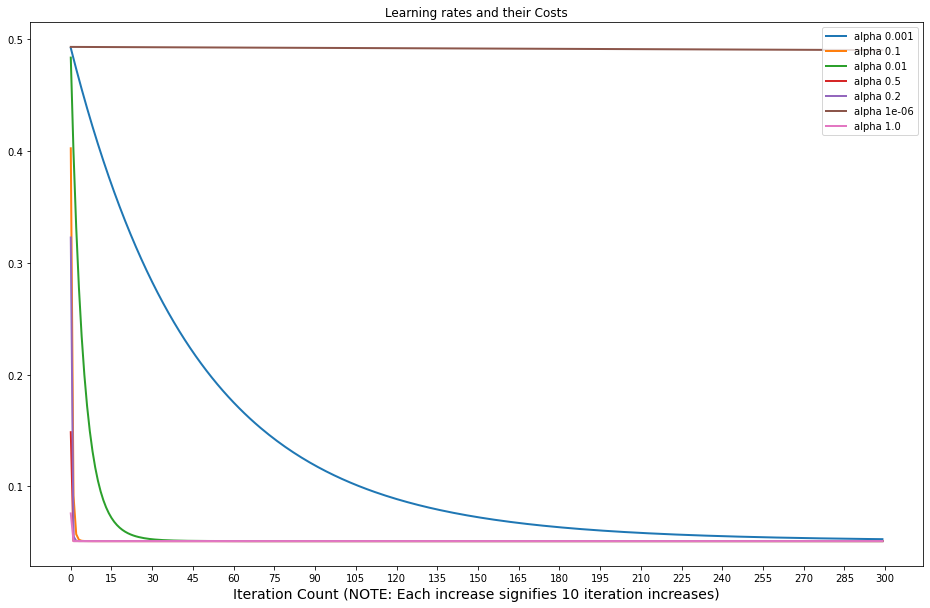

In [38]:
# 300 rows of costs
draw_plot_MSE_Cost(2, 300, 15, False)

## Checking the graph with xticks limited to first 100 rows

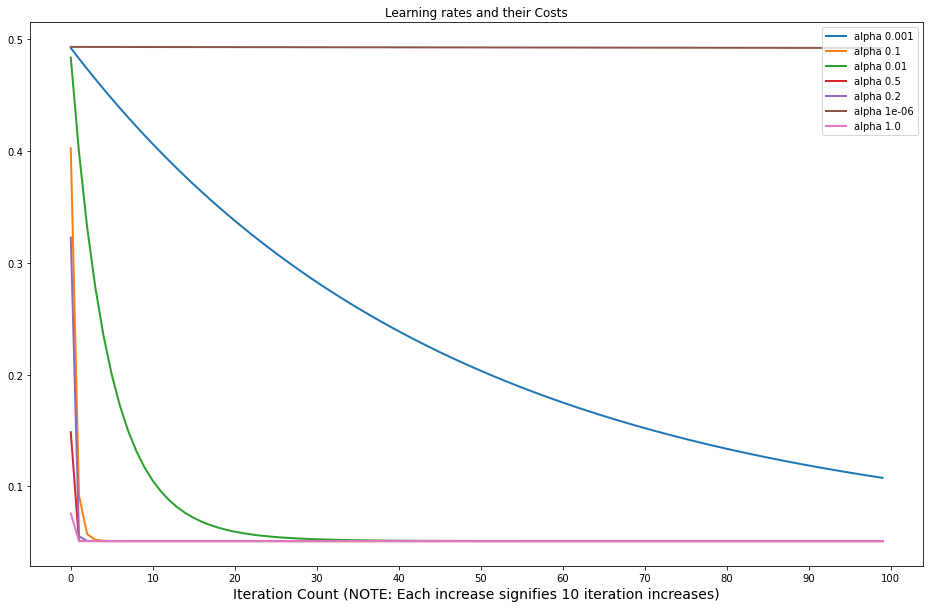

In [39]:
# 100 rows of costs
draw_plot_MSE_Cost(2, 100, 10, False)

As seen from the plots above, despite having the same amount of iterations, the learning rate (alpha) influenced on how their lines would behave. Higher learning rate produced a drastic drop in the Costs and Errors, although with that said, higher learning rates are also prone to overshooting. On the same plots, we can also see that the lowest of learning rates produced lines that have barely budged after 10,000 iterations, compared to that of the other learning rates.

In [43]:
least_squares = np.dot(np.dot(np.linalg.inv(np.dot(x_train.T, x_train)),x_train.T),y_train)


print(f"Gradient Descent:\t{final_w}")
print(f"Least Squares:\t\t{least_squares}")

Gradient Descent:	[-0.00594585  0.74761782  0.54480926  0.01071968]
Least Squares:		[-0.00594585  0.74761782  0.54480926  0.01071968]
